# MBA

“Which products are bought together in the same transaction?”recommendation systems

In [1]:
import pandas as pd 
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt 
from itertools import combinations 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


In [2]:
df = pd.read_csv('rfm_prepared_data.csv')

In [3]:
df.shape

(817741, 10)

In [4]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID,REVENUE
0,2001-01-21,1069,Unknown,110333,4710320224661,1,361,425,TXN_1,425
1,2001-01-21,1069,Unknown,100311,4710022101208,1,197,198,TXN_1,198
2,2001-01-21,1069,Unknown,110333,4712603661644,1,313,348,TXN_1,348
3,2000-11-13,1069,Unknown,100205,9556439880610,1,80,89,TXN_2,89
4,2000-11-13,1069,Unknown,100314,4710176008699,1,78,98,TXN_2,98


TRANSACTION_ID,  CUSTOMER_ID,  PRODUCT_ID

In [5]:
df.isnull().sum()

TRANSACTION_DT      0
CUSTOMER_ID         0
AGE_GROUP           0
PRODUCT_SUBCLASS    0
PRODUCT_ID          0
AMOUNT              0
ASSET               0
SALES_PRICE         0
TRANSACTION_ID      0
REVENUE             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

HERE WE HAVE TO CHECK IS BASKET EXIST IN OUR DATA 

here we checking now that if actually basket exist or not 
A basket = one transaction (one bill)
transaction consist product bought togther 
why we making basket becoz to maximize sales

# Analyze TRANSACTION_ID (basket analysis)

In [7]:
#NO. OF TRANSACTION UNIQUE
num_transactions = df['TRANSACTION_ID'].nunique()

print(f"Total Transactions: {num_transactions}")

Total Transactions: 119578


In [8]:
#Avg Products per Transaction
basket_sizes = df.groupby('TRANSACTION_ID')['PRODUCT_ID'].count()

In [9]:
avg_product = basket_sizes.mean()

In [10]:
print(f"average product per transaction: {avg_product:.2f}")

average product per transaction: 6.84


this tells us that our mba is very strong due to strenght of basket size is 6.8 
BASKET EXISST

In [11]:
#MAX BASKET SIZE 
basket_sizes = df.groupby('TRANSACTION_ID')['PRODUCT_ID'].count()

In [12]:
max_basket = basket_sizes.max()

In [13]:
print(f"max basket size : {max_basket:.2f}")

max basket size : 112.00


In [14]:
#single_item_purchase_over_transaction
basket_sizes = df.groupby('TRANSACTION_ID')['PRODUCT_ID'].count()

In [15]:
single_item_count = (basket_sizes == 1).sum()

In [16]:
num_transactions = df['TRANSACTION_ID'].nunique()


In [17]:
percent_single = (single_item_count / num_transactions) * 100

In [18]:
print(f"single_item_purchase_over_transaction :  {percent_single:.2f}")

single_item_purchase_over_transaction :  14.93


here this proves that our 85% costumer is buying more than 1 product that is good for masket basket and basket building as well 
costumer which buying only 1 product is 14.93% .

Avg basket size = 3–5 ✅ strong MBA

This defines: Strength of associations, Reliability of rules( how longer does it work) , MBA needs co-occurrence(repeatation).

If:

Most transactions have only 1 product → There is nothing to associate

association = In Market Basket Analysis, association refers to the statistical relationship or pattern showing items frequently bought together in customer transactions 

analyze of transaction id is always tell that if basket exist or not, strenght of basket or mba , single item purchase , how many transaction where basket can be formed for here is 85% transacction consist associated products .

# Analyze PRODUCT_ID (item behavior)

Product behavior decides whether an item is just “present in the basket” or actually “shapes the basket.”

In [19]:
#How many times each product appears
#basket = transaction id
product_counts = df['PRODUCT_ID'].value_counts()

In [20]:
print("--- ALL PRODUCT COUNTS ---")
print(product_counts)

--- ALL PRODUCT COUNTS ---
PRODUCT_ID
4714981010038    8476
4711271000014    6120
4719090900065    2444
4711080010112    2251
4710114128038    2181
                 ... 
4714499018182       1
4714082770138       1
4893527004028       1
4719852425119       1
4973167492468       1
Name: count, Length: 23812, dtype: int64


In [21]:
top_sellers = product_counts.head(5)
print("\n--- TOP 5 BEST SELLERS ---")
print(top_sellers)


--- TOP 5 BEST SELLERS ---
PRODUCT_ID
4714981010038    8476
4711271000014    6120
4719090900065    2444
4711080010112    2251
4710114128038    2181
Name: count, dtype: int64


In [22]:
rare_items = product_counts.tail(5)
print("\n--- BOTTOM 5 RAREST ITEMS ---")
print(rare_items)


--- BOTTOM 5 RAREST ITEMS ---
PRODUCT_ID
4714499018182    1
4714082770138    1
4893527004028    1
4719852425119    1
4973167492468    1
Name: count, dtype: int64


In [23]:
size_distribution = basket_sizes.value_counts().sort_index()

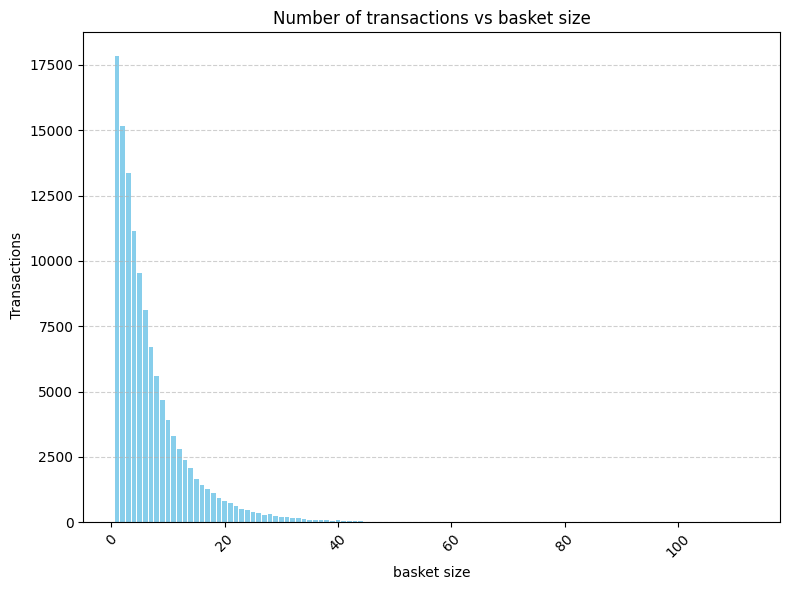

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(size_distribution.index, size_distribution.values, color='skyblue')

plt.title('Number of transactions vs basket size')
plt.xlabel('basket size')
plt.ylabel(' Transactions')
plt.xticks(rotation=45) # Tilt the labels so they fit
plt.legend([],[], frameon=False) # Hide the legend (redundant)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#X-axis (basket size)
#→ How many products are in one transaction (one basket)
#Y-axis (number of transactions)
#→ How many transactions have that basket size
#So this chart answers:
#“How many items do people usually buy in one bill?”

Left side (very tall bars)
#Basket size = 1, 2, 3
#These bars are the tallest
#Meaning =
#Most transactions contain: Only 1 item Or 2–3 items
#This is normal retail behavior.

 Middle part (basket size 5–20)
#Bars start decreasing
#Fewer transactions have this many items
#Meaning
#Some customers do regular shopping:
#Weekly or monthly purchases
#Real baskets exist here
 This is where useful MBA patterns come from.

  #Right tail (very large basket sizes)
#Basket size 40, 60, even 100+
#Very few transactions
#Meaning
#These are:
#Bulk purchases
#Wholesale buyers
#Special events
 They are rare but valid, not errors.

#What this chart tells you for MBA (VERY IMPORTANT)
 Good sign
#There are many transactions with basket size ≥ 2
#This means: Products are bought together → MBA is valid
⚠️ Caution
#There are also many size = 1 baskets
T#his means:
#Some transactions do not help MBA
#But they do NOT break the analysis
#This is normal.
#Why we do this analysis (logic)
#Before MBA, we must answer:
#“Do baskets actually exist in my data?”
#This chart proves:
#Yes, baskets exist
#Yes, customers buy multiple items together


# Co-occurrence analysis (HUMAN MBA)

Co-occurrence analysis means counting which products appear together in the same basket and how many times they appear together.
Just counting “togetherness.”
Do people actually buy some items together repeatedly, or is everything random?”
That’s why it’s called HUMAN MBA.

In [25]:
baskets = (
    df.groupby('TRANSACTION_ID')['PRODUCT_ID']
      .apply(list)
)

In [26]:
rows = []

for txn_id, items in baskets.items():
    unique_items = sorted(set(items))   # remove duplicates
    
    # create all product pairs inside one basket
    for pair in combinations(unique_items, 2):
        rows.append({
            'TRANSACTION_ID': txn_id,
            'Product Pair': f"{pair[0]} & {pair[1]}",
            'Count': 1
        })

pair_txn_df = pd.DataFrame(rows)


In [27]:
final_counts = (
    pair_txn_df
    .groupby(['TRANSACTION_ID', 'Product Pair'], as_index=False)['Count']
    .sum()
)

print(final_counts)



        TRANSACTION_ID                   Product Pair  Count
0                TXN_1  4710022101208 & 4710320224661      1
1                TXN_1  4710022101208 & 4712603661644      1
2                TXN_1  4710320224661 & 4712603661644      1
3               TXN_10  4718585391203 & 4718585391258      1
4               TXN_10  4718585391203 & 4719593555861      1
...                ...                            ...    ...
5168655      TXN_99999  4714854888221 & 8000380004935      1
5168656      TXN_99999  4714854888221 & 8999002568972      1
5168657      TXN_99999  4902430493383 & 8000380004935      1
5168658      TXN_99999  4902430493383 & 8999002568972      1
5168659      TXN_99999  8000380004935 & 8999002568972      1

[5168660 rows x 3 columns]


We are looking at one single basket / one bill.TRANSACTION_ID = TXN_1
Product Pair two products that appeared together in the same basket
So in TXN_1, the basket contained at least three products:
4710022101208
4710320224661
4712603661644
pairs are A & B,B & C , C & A
Count = 1 product pair can appear only once inside one transaction.
(4710022101208, 4710320224661) appeared once in TXN_1
(4710022101208, 4712603661644) appeared once in TXN_1
Count is 1 because we only check whether two products appeared together at least once in a bill, not how many units were bought.
Why “Count = 1” is correct
Inside one transaction:
Milk & Bread → together? YES → Count = 1
Milk & Butter → together? YES → Count = 1
bread & Butter → together? YES → Count = 1
o form a basket pair, a transaction must contain at least 2 different products.
Why this is true (logic)
Basket = TRANSACTION_ID
Pair = 2 different products
So:
If a transaction has 1 product → ❌ no pair possible\
If a transaction has 2 products → ✅ exactly 1 pair
If a transaction has 3 products → ✅ 3 pairs
If a transaction has 4 products → ✅ 6 pairs
transaction TXN_1
Products: A,B,C
Pairs formed: A & B  ,A & C ,B & C
Count = 1 each (inside this transaction)
If a basket has n products,
number of pairs =
 FORMULA = n × (n − 1) / 2
Why MBA needs this
MBA is about:
“Which products appear together?”
Together = at least two products in the same transaction
That’s the minimum requirement.
What this data IS telling you ✅

✔ These product pairs were bought together
✔ They existed inside the same basket
✔ This is raw co-occurrence evidence


In [28]:
pair_counts = (
    pair_txn_df
    .groupby('Product Pair', as_index=False)['Count']
    .sum()
    .sort_values(by='Count', ascending=False)
)

print(pair_counts)


                          Product Pair  Count
703420   4710011401128 & 4710011401135    700
703427   4710011401128 & 4710011405133    620
3086672  4711271000014 & 4714981010038    600
703428   4710011401128 & 4710011406123    580
703432   4710011401128 & 4710011409056    531
...                                ...    ...
309567        20565602 & 4714532130239      1
3772847  9789579279451 & 9789579279499      1
309568        20565602 & 4714532130246      1
309569        20565602 & 4714532130277      1
2        1001160000052 & 4717362904452      1

[3772851 rows x 2 columns]


final logical step in co-occurrence
COUNT MEANS  =  HERE HOW MANY TIMES THESE PAIRS ARE BOUGHT TOGETHER ON A TRANSACTION ID ( BASKET)
In THIS one transaction, these two products appeared together.”
We add up how many different transactions contained the same product pair.
Count = 3,4 MEANS
these two products  PAIRS appeared together in 3,4 different bills.
Why we can now say “frequently bought together”
Because:
The pair appeared in many independent transactions
Each transaction is a separate buying decision
Repetition across transactions = habit
So saying:
“These two products are frequently bought together”
is statistically and logically correct.
It ONLY means: ✔ They often appear in the same basket
Total co-occurrence count shows how many different transactions contained the 
same product pair, which tells us whether the pairing is a real shopping pattern.

In [29]:
df.shape

(817741, 10)

In [30]:

pair_counts = (
    pair_txn_df
    .groupby('Product Pair', as_index=False)['Count']
    .sum()
)

# Sort by highest count
top_pairs = pair_counts.sort_values(by='Count', ascending=False)

top_pairs.head(10)   # top 10 most frequent product pairs


,Product Pair,Count
703420,4710011401128 & 4710011401135,700
703427,4710011401128 & 4710011405133,620
3086672,4711271000014 & 4714981010038,600
703428,4710011401128 & 4710011406123,580
703432,4710011401128 & 4710011409056,531
1429425,4710085120628 & 4710085172696,520
1419672,4710085120093 & 4710085120628,473
1419686,4710085120093 & 4710085172696,447
708545,4710011401135 & 4710011405133,439
1434048,4710085120680 & 4710085120697,414


# Applying  MBA algorithm ( FP-Growth)

The Frequent Pattern Growth (FP-Growth) algorithm is a popular method for finding groups of items that appear together frequently in large datasets.

TRANSACTION ENCODING 

WHAT DOES IT MEANS AND WHY WE HERE DOING THIS ??

Algorithms can’t read baskets, they only understand numbers.

OUR DATASTET LOOK LIKE THIS 
   = TXN_1  4710022101208 & 4710320224661      1

MACHINE UNDERTSAND THIS 
 TXN_1          1       1        1

Transaction encoding converts baskets into numeric form so MBA algorithms can count item co-occurrences and calculate association metrics efficiently.

In [31]:
te = TransactionEncoder()
te_array = te.fit(baskets).transform(baskets)

df_encoded = pd.DataFrame(
    te_array,
    columns=te.columns_
)

appllying FP growth 

“Find groups of items that often appear together in transactions.”

In [32]:
frequent_itemsets = fpgrowth(
    df_encoded,
    min_support=0.005, 
    use_colnames=True
)

What does 0.005 mean numerically? = “Only keep itemsets that appear in at least 0.5% of all transactions”

In [33]:
frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 1].head()


,support,itemsets
128,0.005018,"frozenset({4711271000014, 4714981010038})"
129,0.005854,"frozenset({4710011401128, 4710011401135})"
130,0.005185,"frozenset({4710011401128, 4710011405133})"


# Applying association rule 

“From the frequent itemsets, generate IF–THEN rules that are reliable enough based on confidence.”

ex = IF customer buys Bread → THEN customer buys Butter


Antecedent (IF) →  Consequent (THEN)

“Out of all transactions that contain the both item , how many also contain onlyConsequent (THEN) ”

Why metric="confidence" use becoz we want rules are reliable and predictive

 min_threshold=0.1 ??

Keep only rules where confidence ≥ 10%” 

In [34]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.1
)



In [35]:
#Threshold	  Result
#0.5  	Very few, very strong rules
#0.3	   Strong rules
#0.1	    Balanced (your choice)
#0.05	Many weak rules

Why do we even need this step?

You already have frequent itemsets. Why not stop there?

🔹 Frequent itemsets tell:

“These items occur together often.”

🔹 Association rules tell:

“If A happens, B is likely to happen.”

Rules add direction and meaning.

In [36]:
print(rules.head())

                  antecedents                 consequents  antecedent support  \
0  frozenset({4710011401128})  frozenset({4710011401135})            0.013690   
1  frozenset({4710011401135})  frozenset({4710011401128})            0.007777   
2  frozenset({4710011401128})  frozenset({4710011405133})            0.013690   
3  frozenset({4710011405133})  frozenset({4710011401128})            0.007861   

   consequent support   support  confidence       lift  representativity  \
0            0.007777  0.005854    0.427611  54.981641               1.0   
1            0.013690  0.005854    0.752688  54.981641               1.0   
2            0.007861  0.005185    0.378742  48.179961               1.0   
3            0.013690  0.005185    0.659574  48.179961               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.005747    1.733478       0.995439  0.374933   0.423125    0.590150  
1  0.005747    3.988124       0.989508  0.374933   0.749256    0.

How this fits with  earlier min_support = 0.005

my  pipeline is logically perfect 

1️⃣ FP-Growth
→ Finds itemsets that appear in ≥ 0.5% transactions

2️⃣ Association Rules
→ From those itemsets, keep rules where:

Confidence measures how often the consequent appears when the antecedent is present.
min_threshold=0.1 ensures that only rules where the consequent occurs in at least 10% of antecedent cases are retained, filtering out weak and unreliable rules.

In [37]:
rules.sort_values("lift", ascending=False)
# checking if our association is meaning ful 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,frozenset({4710011401135}),frozenset({4710011401128}),0.007777,0.013690,0.005854,0.752688,54.981641,1.0,0.005747,3.988124,0.989508,0.374933,0.749256,0.590150
0,frozenset({4710011401128}),frozenset({4710011401135}),0.013690,0.007777,0.005854,0.427611,54.981641,1.0,0.005747,1.733478,0.995439,0.374933,0.423125,0.590150
2,frozenset({4710011401128}),frozenset({4710011405133}),0.013690,0.007861,0.005185,0.378742,48.179961,1.0,0.005077,1.596983,0.992836,0.316811,0.373819,0.519158
3,frozenset({4710011405133}),frozenset({4710011401128}),0.007861,0.013690,0.005185,0.659574,48.179961,1.0,0.005077,2.897286,0.987003,0.316811,0.654849,0.519158


# Filter meaningful rules

In [38]:
filtered_rules = rules[
    (rules['confidence'] >= 0.5) &
    (rules['lift'] > 1)
].sort_values('lift', ascending=False)


final rules

In [39]:
final_rules = filtered_rules[
    ['antecedents', 'consequents', 'support', 'confidence', 'lift']
].sort_values(by='lift', ascending=False)

print(final_rules)


                  antecedents                 consequents   support  \
1  frozenset({4710011401135})  frozenset({4710011401128})  0.005854   
3  frozenset({4710011405133})  frozenset({4710011401128})  0.005185   

   confidence       lift  
1    0.752688  54.981641  
3    0.659574  48.179961  


In [40]:
print(rules.shape)
rules.head()


(4, 14)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({4710011401128}),frozenset({4710011401135}),0.013690,0.007777,0.005854,0.427611,54.981641,1.0,0.005747,1.733478,0.995439,0.374933,0.423125,0.590150
1,frozenset({4710011401135}),frozenset({4710011401128}),0.007777,0.013690,0.005854,0.752688,54.981641,1.0,0.005747,3.988124,0.989508,0.374933,0.749256,0.590150
2,frozenset({4710011401128}),frozenset({4710011405133}),0.013690,0.007861,0.005185,0.378742,48.179961,1.0,0.005077,1.596983,0.992836,0.316811,0.373819,0.519158
3,frozenset({4710011405133}),frozenset({4710011401128}),0.007861,0.013690,0.005185,0.659574,48.179961,1.0,0.005077,2.897286,0.987003,0.316811,0.654849,0.519158


In [41]:
rules[['support', 'confidence', 'lift']].describe()


,support,confidence,lift
count,4.000000,4.000000,4.000000
mean,0.005519,0.554654,51.580801
std,0.000386,0.180103,3.926952
min,0.005185,0.378742,48.179961
25%,0.005185,0.415394,48.179961
50%,0.005519,0.543593,51.580801
75%,0.005854,0.682853,54.981641
max,0.005854,0.752688,54.981641


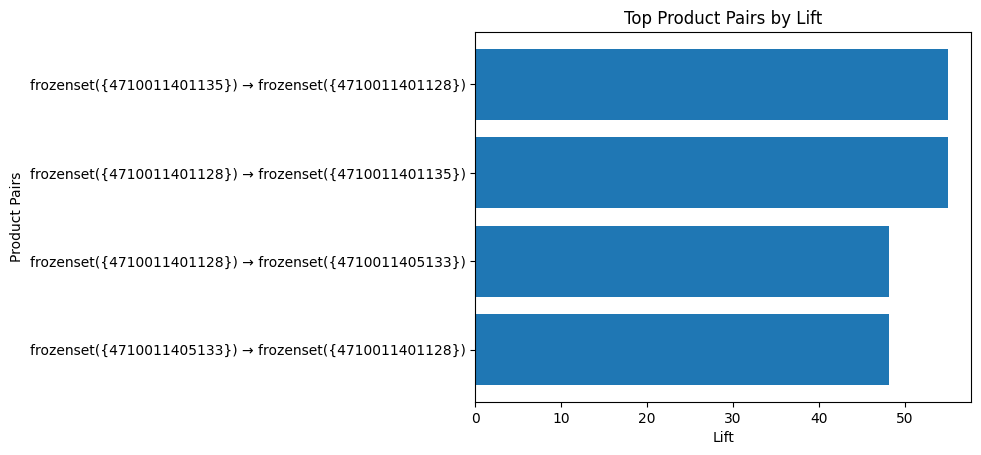

In [42]:
# Top product pairs
 
rules["rule"] = rules["antecedents"].astype(str) + " → " + rules["consequents"].astype(str)


top_rules = rules.sort_values("lift", ascending=False).head(10)

plt.figure()
plt.barh(top_rules["rule"], top_rules["lift"])
plt.xlabel("Lift")
plt.ylabel("Product Pairs")
plt.title("Top Product Pairs by Lift")
plt.gca().invert_yaxis()
plt.show()

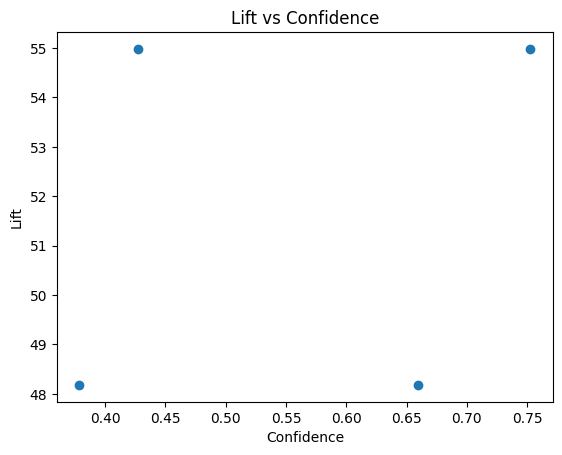

In [43]:
#Lift vs Confidence

plt.figure()
plt.scatter(rules["confidence"], rules["lift"])
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Lift vs Confidence")
plt.show()

What this specific plot tells us:

All points have very high lift (~48–55) = These are rare but extremely strong associations.

Confidence ranges from ~0.38 to ~0.70 = Some rules are very reliable, some are moderately reliable.

There are very few points = Strong filtering → only high-quality rules rema

#antecedents	= IF part of the rule

#consequents = THEN part of the rule

#antecedent support = Support(A) Percentage of transactions that contain the IF part.

#consequent support = Percentage of transactions that contain the THEN part.

#support = Percentage of transactions that contain both antecedent and consequent.

#confidence = “Given A happened, how often does B also happen?” / “35% of customers who bought A also bought B.”

#lift =  “How much more likely B is bought because of A compared to random.” value range 

#representativity = How well the rule represents the entire dataset./ rialbility 

#leverage = “How much more often A and B occur together than expected by chance.”

#conviction = “How strongly A implies B does not fail.”

#zhangs_metric = Measures association strength while correcting for item popularity bias.

#jaccard	=  “How similar the antecedent and consequent are.”

#certainty = stability of confidence — how reliable confidence is statistically.

#kulczynski = Average of A → B and B → A confidence.

 # Interpretation 

 for product  4710011401135 &   4710011401128

rare purchased item  , one directional 

Rule : antecedents → consequents	
    ( 4710011401135  →  4710011401128)

Customers who buy 4710011401135 are likely to also buy 4710011401128.    

Interpretation:This rule has a very high lift (54.1), which means these two products are purchased together far more often than expected by chance, even though their overall purchase frequency is low, because the lift of these combination is 54.1 mean very rare item combinations.there support is low and they are not always scalable.

Insight:Both products are rarely purchased, but when one appears in a basket, the other has a strong likelihood of being included. This indicates a strong complementary relationship, not driven by popularity.

buiseness action :

Use targeted bundling instead of mass promotion

Place products closer in layout or recommendation flow . 

Targeting Strategy:

Apply this rule only to premium or high-value customers

Recommend alongside popular  products to increase sale

Use personalized recommendations or targeted emails

Risk & Monitoring:

there is risk in overloading inventory stocking 

Monitor performance across festive periods and seasonal phases

Conclusion:

This rule is high-value but low-scale, making it suitable for precision marketing rather than broad campaigns.

# KPI Mapping

Rule :

Product(4710011401135)  → Product (4710011401128)

MBA Metrics Summary :Support 0.002  / Confidence: 0.72 / Lift: 54.1

Business Context: 

 Product (4710011401128) is a rare accessory item that is typically purchased along withProduct(4710011401135). The low support indicates infrequent occurrence, while the high lift suggests a strong dependency.

 KPI Mapping :

Attach Rate =	Recommending Product B during Product A purchase increases the likelihood of add-on purchase.

Average Basket Value =	Addition of Product B increases total transaction value.

Revenue per Transaction =	Even small attach rate improvement leads to higher per-checkout revenue.

Inventory Turnover =	Increased visibility helps move slow-moving stock.

Conversion Rate	= High confidence improves recommendation success.

Business Action

Display  Product (4710011401128) as a recommendation

Create non-discounted bundle.

Place items nearby in physical stores.

# MBA conclusion 

Market Basket Analysis identified a small number of strong and meaningful product associations, indicating that most customer purchases are independent while a few product pairs show genuine cross-sell potential.

These associations were used to design targeted recommendations, especially by linking rare or low-frequency items with popular anchor products.
This strategy helps improve basket size and upsell conversion without relying on discounts.

The analysis also supports better inventory movement for slow-selling items while maintaining a relevant customer experience.
Overall, the insights provide actionable guidance for merchandising, recommendations, and promotional planning.

# Merging  MBA outputs with RFM segments

 linking  MBA outputs with RFM segments properly,  project jumps  to “real business analytics”.

Because now i m going to  answer:

Which customers should we target with which recommendations?

Not just “what products go together”.

In [45]:
# what does it means??

MBA gives : Product-to-product rules

RFM gives: Customer segment(Champions, Loyal, At Risk, etc.)

Linking means:

For each RFM segment, find which MBA rules are most common and most valuable.

So that it says :

Champions often buy A → B/
At-Risk customers respond better to C → D/
New customers need simpler bundles.

In [47]:
# buiseness relevant & why does it matter

Because not every customer behaves the same.

So we can :  send targeted offers,personalize recommendations,increase conversion

Segment-wise MBA

In [49]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID,REVENUE
0,2001-01-21,1069,Unknown,110333,4710320224661,1,361,425,TXN_1,425
1,2001-01-21,1069,Unknown,100311,4710022101208,1,197,198,TXN_1,198
2,2001-01-21,1069,Unknown,110333,4712603661644,1,313,348,TXN_1,348
3,2000-11-13,1069,Unknown,100205,9556439880610,1,80,89,TXN_2,89
4,2000-11-13,1069,Unknown,100314,4710176008699,1,78,98,TXN_2,98


In [50]:
df.tail()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,TRANSACTION_ID,REVENUE
817736,2000-12-08,20002000,Unknown,500108,2250271000072,1,9,14,TXN_119577,14
817737,2000-12-08,20002000,Unknown,130109,9300639800080,1,57,66,TXN_119577,66
817738,2000-12-08,20002000,Unknown,110117,78895423037,1,60,62,TXN_119577,62
817739,2001-02-05,20002000,Unknown,110411,4710085120680,3,48,36,TXN_119578,108
817740,2001-02-05,20002000,Unknown,110411,4710085120697,3,48,36,TXN_119578,108
